<a href="https://colab.research.google.com/github/mohanpartha/ML_preprocessing/blob/master/pump_it_up_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_labels = pd.read_csv('/content/drive/My Drive/data/pump_it_up/training_set_labels.csv',sep=',')
df_train = pd.read_csv('/content/drive/My Drive/data/pump_it_up/training_set_values.csv',sep=',')
df_submission = pd.read_csv('/content/drive/My Drive/data/pump_it_up/SubmissionFormat.csv',sep=',')
df_test = pd.read_csv('/content/drive/My Drive/data/pump_it_up/test_set_values.csv',sep=',')

In [9]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [0]:
# Remove Outliers

In [21]:
df_train['amount_tsh'].value_counts

<bound method IndexOpsMixin.value_counts of 0        6000.0
1           0.0
2          25.0
3           0.0
4           0.0
          ...  
59395      10.0
59396    4700.0
59397       0.0
59398       0.0
59399       0.0
Name: amount_tsh, Length: 59400, dtype: float64>

In [53]:
df_train['amount_tsh'].count

<bound method Series.count of 0        6000.0
1           0.0
2          25.0
3           0.0
4           0.0
          ...  
59395      10.0
59396    4700.0
59397       0.0
59398       0.0
59399       0.0
Name: amount_tsh, Length: 59400, dtype: float64>

In [74]:
df = df_train.groupby(['amount_tsh']).count()
print (df)

               id  date_recorded  ...  waterpoint_type  waterpoint_type_group
amount_tsh                        ...                                        
0.00        41639          41639  ...            41639                  41639
0.20            3              3  ...                3                      3
0.25            1              1  ...                1                      1
1.00            3              3  ...                3                      3
2.00           13             13  ...               13                     13
...           ...            ...  ...              ...                    ...
138000.00       1              1  ...                1                      1
170000.00       1              1  ...                1                      1
200000.00       1              1  ...                1                      1
250000.00       1              1  ...                1                      1
350000.00       1              1  ...                1          

In [84]:
df_train.groupby(['amount_tsh']).mean()

,id,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
amount_tsh,,,,,,,,,
0.00,37183.585101,540.626216,33.280343,-5.269670,0.307428,15.499195,5.677922,142.139100,1022.458440
0.20,46694.333333,919.000000,36.966694,-4.729552,0.000000,6.333333,3.000000,198.000000,665.000000
0.25,62393.000000,685.000000,37.357509,-3.586230,0.000000,3.000000,4.000000,1.000000,2008.000000
1.00,56899.666667,-20.333333,38.977464,-5.425206,0.000000,4.000000,5.000000,1833.333333,1966.666667
2.00,41906.538462,1143.384615,36.224530,-3.953274,0.000000,16.846154,1.692308,292.923077,2011.307692
...,...,...,...,...,...,...,...,...,...
138000.00,54154.000000,-7.000000,38.910446,-6.462283,0.000000,6.000000,1.000000,587.000000,2007.000000
170000.00,70107.000000,127.000000,38.420467,-6.640090,0.000000,6.000000,1.000000,150.000000,2008.000000
200000.00,7860.000000,98.000000,38.978067,-5.122702,0.000000,4.000000,4.000000,800.000000,0.000000


In [59]:
df_train['amount_tsh'].value_counts

<bound method IndexOpsMixin.value_counts of 0        6000.0
1           0.0
2          25.0
3           0.0
4           0.0
          ...  
59395      10.0
59396    4700.0
59397       0.0
59398       0.0
59399       0.0
Name: amount_tsh, Length: 59400, dtype: float64>

In [62]:
df_train.query('amount_tsh == 0.0')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [73]:
df_train.query('amount_tsh > 19999')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
194,4807,25000.0,2011-04-14,Secondary Schoo,1768,secondary school,34.716010,-9.129740,Head Master,0,Rufiji,Sadani,Iringa,11,4,Njombe,Mdandu,25,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1987,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
543,24691,40000.0,2011-02-23,Idc,1711,DWE,35.408794,-8.112945,none,0,Rufiji,Ulete,Iringa,11,1,Iringa Rural,Ifunda,430,True,GeoData Consultants Ltd,VWC,Muwimb,True,2010,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
993,32502,20000.0,2013-09-03,Oxfam,1540,DWE,36.686221,-3.339980,Kwa Longololi,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,150,True,GeoData Consultants Ltd,VWC,Nabaiye pipe line,True,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe
2559,16230,20000.0,2013-09-03,Oxfam,1515,DWE,36.696700,-3.337926,Oroirwa,0,Pangani,Oroirwa,Arusha,2,2,Arusha Rural,Oltroto,150,True,GeoData Consultants Ltd,VWC,Nabaiye pipe line,True,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe
2866,3862,25000.0,2011-04-14,Secondary Schoo,1766,Secondary school,34.715612,-9.128597,Secondary School,0,Rufiji,Sadani,Iringa,11,4,Njombe,Mdandu,1040,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1987,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57811,64148,117000.0,2011-03-25,Lutheran Church,1646,lutheran church,34.534142,-9.121245,Bible College,0,Rufiji,Lungemba,Iringa,11,4,Njombe,Imalinyi,400,True,GeoData Consultants Ltd,WUA,improved,True,1992,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe
58283,12922,20000.0,2013-09-03,Oxfam,1537,DWE,36.685552,-3.337501,Kanisani,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,150,True,GeoData Consultants Ltd,VWC,Nabaiye pipe line,True,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
58313,34106,20000.0,2013-09-03,Oxfam,1498,DWE,36.683108,-3.343116,Kwa Sheheli,0,Pangani,Ikenywa,Arusha,2,2,Arusha Rural,Oltroto,300,True,GeoData Consultants Ltd,VWC,Nabaiye pipe line,True,1995,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe
58566,28881,25000.0,2011-03-24,Secondary,1992,secondary,34.615714,-9.234618,Philip Mangula Secondary,0,Rufiji,Amani,Iringa,11,4,Njombe,Imalinyi,176,True,GeoData Consultants Ltd,WUA,imalinyi supply scheme,True,2009,gravity,gravity,gravity,wua,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


In [47]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plot
pd.options.plotting.backend

'matplotlib'

In [0]:
pd.DataFrame.plot(df_train['amount_tsh'])

In [0]:
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

KeyError: ignored

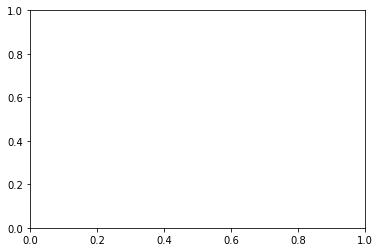

In [49]:
# Draw a scatter plot
df_comb.plot.scatter(x=df_comb['amount_tsh'], y=df_comb['status_group'], title= "Scatter plot between two variables X and Y");
plot.show(block=True);

In [0]:
amount_tsh = pd.Series(df_train['amount_tsh'])

In [0]:
scatter_matrix(amount_tsh, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [35]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


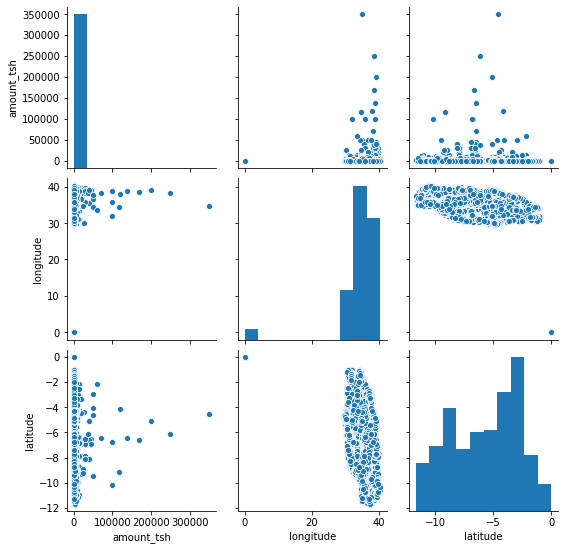

In [36]:
sns.pairplot(df_train.loc[:,df_train.dtypes == 'float64'])

In [37]:
df_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [0]:
 frames = [df_train, df_labels]

In [0]:
df_comb = pd.concat(frames)

In [44]:
df_comb.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')